# Polynomial Regression

## Dataset - Power Generation Dataset
### Predict - PE (Energy OP) using using Features
### AT - Ambient Temperature
### V - Exhaust Vaccum
### AP - Ambient Pressure
### RH - Relative Humidity
### PE - Energy Output

## Importing the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [5]:
dataset = pd.read_csv('Data/Power_Output_Prediction.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Polynomial Regression model on the Training set

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

## Predicting the Test set results

In [8]:
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[433.94 431.23]
 [457.9  460.01]
 [460.52 461.14]
 ...
 [469.53 473.26]
 [438.27 438.  ]
 [461.66 463.28]]


In [9]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df


,Actual,Predicted
0,431.23,433.943760
1,460.01,457.904572
2,461.14,460.524736
3,445.90,447.565236
4,451.29,457.215229
...,...,...
1909,460.29,463.468186
1910,452.42,455.975118
1911,473.26,469.528918
1912,438.00,438.265516


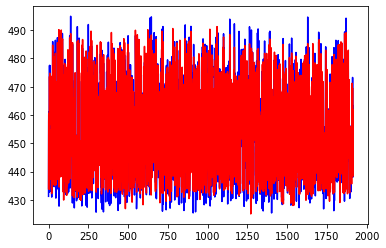

In [10]:
plt.plot(y_test,color = 'blue')
plt.plot(y_pred,color = 'red')

## Evaluating the Model Performance

In [11]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9458193390165572